In [128]:
# 2 color graph coloring problem circuit
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram
import networkx as nx

In [129]:
def getCons(graph):
    g = []
    for (u,v) in graph:
        g.append((u,v))
        if (v,u) not in g:
            g.append((v,u))
            
    cmap = dict()
    for (a,b) in g:
        for (c,d) in g:
            u = a; v = b; x = c; y = d
            if (v == x) and (u != y):
                if y <= u:
                    u, y = y, u
                if (u,y) not in g:
                    cmap[(u,y)] = (u,y)
    return list(cmap)


[(0, 2), (1, 3)]


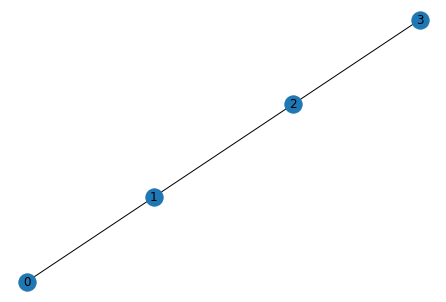

In [130]:
# Define the graph by giving the ends of each edge

# g = [(0,1), (1,2), (1,3), (2,4), (3,4)]
g = [(0,1),(1,2),(2,3)]

# get the additional constraints between vertices which
# have a common neighbour
cons = getCons(g)

nVert = max(max(g))+1
nodes = list(range(nVert))
nEdges = len(g)
nCons = len(cons)

print(cons)

# list of all constraints to apply to graph
cg = []
cg.extend(g)
cg.extend(cons)


# view the graph
ngx = nx.Graph()
for i in g:
    ngx.add_edge(i[0], i[1])
nx.draw(ngx, with_labels=True)

In [131]:
ce = 2
# Create a Quantum Circuit
qv = QuantumRegister(ce*nVert)
q = QuantumRegister(ce*(nEdges+nCons))
c = ClassicalRegister(ce*nVert)
qc = QuantumCircuit(qv,q,c)


In [132]:
# Add the gates to the circuit for each edge in the graph
for i in range(nVert*ce):
    qc.h(i)

k = nVert*ce
for edge in cg:
    i = edge[0]*ce
    j = edge[1]*ce
    
    qc.ccx(i,j,k)
    qc.ccx(i+1,j+1,k+1)

    # replace the |1...1> state with |0...0>
    # qc.ccx(k+1,k,i)
    # qc.ccx(k+1,k,i+1)
    # qc.ccx(k+1,k,j)
    # qc.ccx(k+1,k,j+1)

    qc.x(i)
    qc.x(i+1)
    qc.x(j)
    qc.x(j+1)
    qc.ccx(i,j,k)
    qc.ccx(i+1,j+1,k+1)
    qc.x(i)
    qc.x(i+1)
    qc.x(j)
    qc.x(j+1)

    qc.ccx(k+1,k,j)
    qc.cx(k,j)
    qc.cx(k+1,j+1)
    # qc.ccx(k+1,k,j)
    # qc.ccx(k+1,k,j+1)
    qc.barrier()

    k += 2


In [133]:
# measure all the input qubits
qc.measure(qv,c)


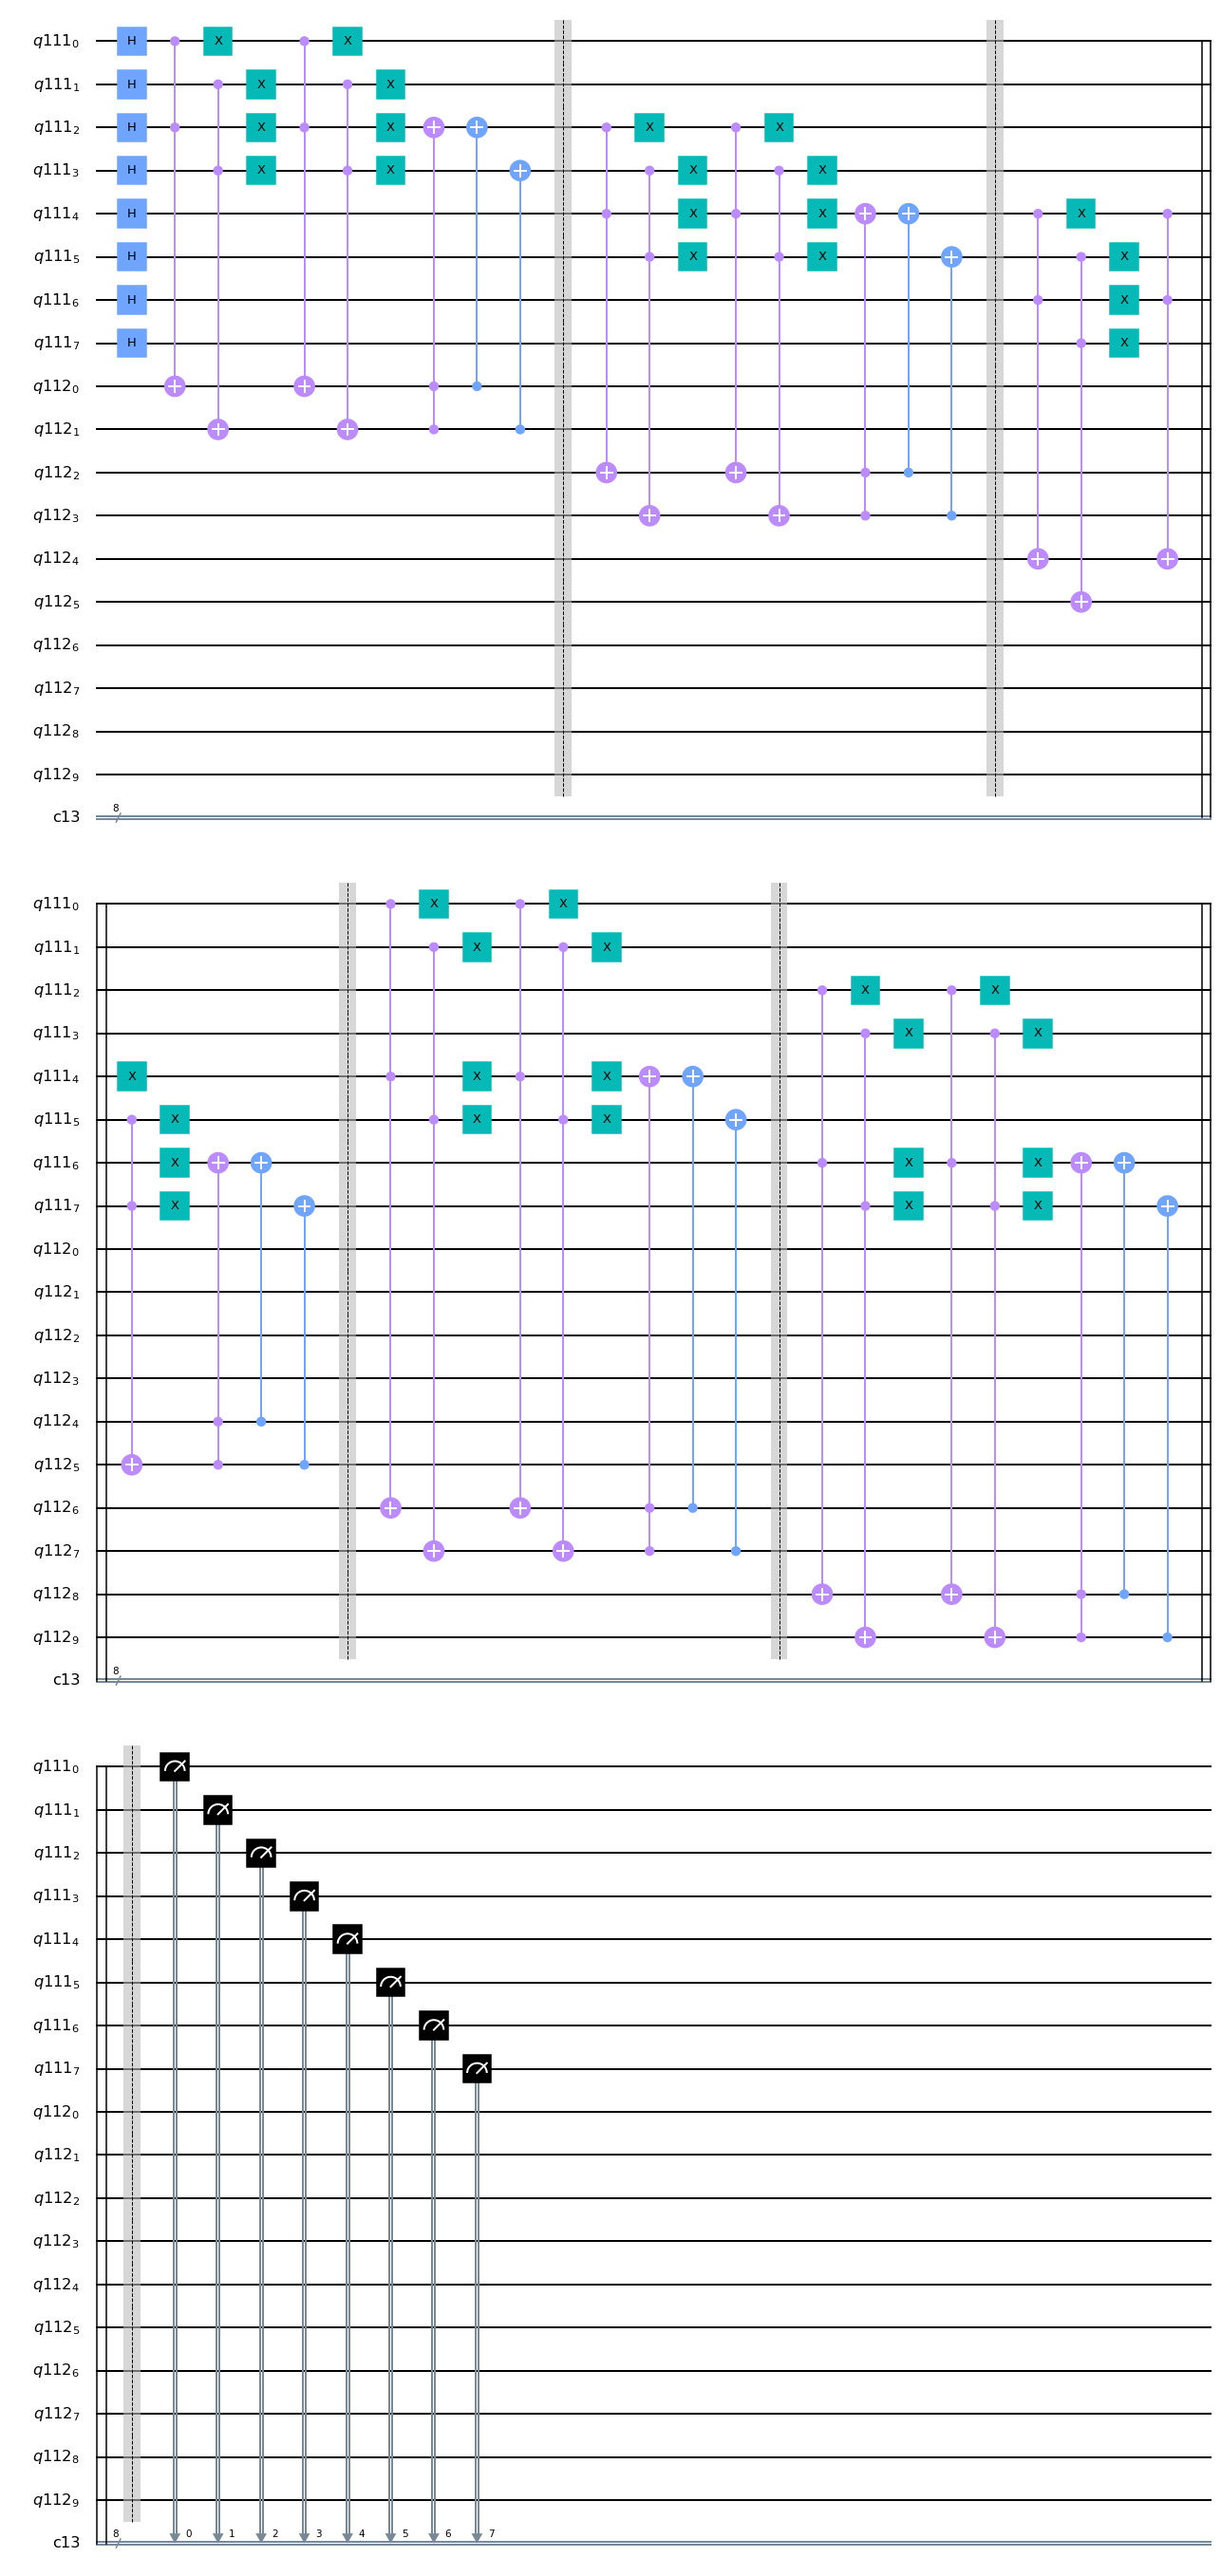

In [134]:
#--------------- Drawing
qc.draw(output='mpl')

{'00101000': 5, '00101001': 12, '00101100': 35, '00101101': 9, '00111000': 33, '00111001': 98, '00111100': 44, '00111101': 9, '01101000': 11, '01101001': 22, '01101100': 100, '01101101': 42, '01111000': 15, '01111001': 19, '01111100': 14, '01111101': 3, '10000010': 3, '10000011': 8, '10000110': 46, '10000111': 10, '10010010': 38, '10010011': 105, '10010110': 37, '10010111': 16, '11000010': 15, '11000011': 43, '11000110': 131, '11000111': 39, '11010010': 11, '11010011': 37, '11010110': 11, '11010111': 3}


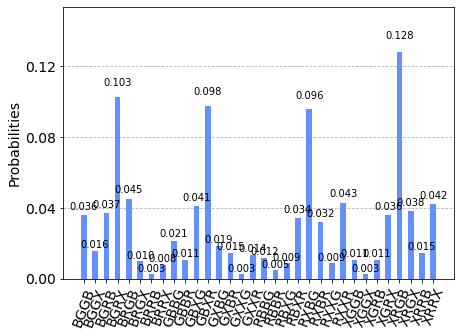

In [135]:
# Use Aer's qasm_simulator
backend_qasm_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_qasm_sim, shots=1024)

# display the results
result_qasm_sim = job_sim.result()
counts = result_qasm_sim.get_counts()
print(counts)

cMap = {'00':'R', '01':'G', '10':'B', '11':'X'}
cCount = dict()
for k in counts:
    s = ""
    i = 0
    while i < len(k):
        s += cMap[k[i:i+2]]
        i += 2
    cCount[s] = counts[k]

plot_histogram(cCount)


In [136]:
c = result_qasm_sim.get_counts()

colormaps = []

for key in c:
    colormap = []
    for i in reversed(key):
        if i == '0':
            colormap.append('red')
        else:
            colormap.append('blue')
    colormaps.append(colormap)


In [137]:
# nx.draw(ngx, node_color=colormaps[1], with_labels=True)

In [138]:
# nx.draw(ngx, node_color=colormaps[0], with_labels=True)